<a href="https://colab.research.google.com/github/RJuro/am-21/blob/main/2022_02_09_HA_Math_1_2_Vektor_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vektorer

Sidste gang så vi, hvordan man bruger en **augmented matrix** og rækkeoperationer, der bevarer forholdene i et system til at løse et system med lineære funktioner. 

En matrix er i sidste ende en måde at repræsentere en tabel med tal. Alle matricer, vi arbejdede med sidste gang, havde 2 rækker og 3 kolonner. Her er den første, der opsætter vores lineære system

$$
\left[
  \begin{matrix}
    300 & -1 \\
    400 & -1 \\
  \end{matrix}
  \left|
    \,
    \begin{matrix}
      -2500  \\
      -500  \\
    \end{matrix}
  \right.
\right]
$$

Det er en $2x3$ matrix og per konvention er det først rækker og så kolonner som vi tæller - det afspejler sig også i den måde vi tilgå en matrix via NumPy eller tabeller i Pandas.


Hver af vore rækker og kolonner i denne matrix er repræsenteret som en **liste** af tal. En liste med tal er kendt som en **vektor**. En række fra en matrix er kendt som en rækkevektor, mens en søjle er kendt som en søjlevektor. Her er rækkevektorerne:


  \begin{bmatrix}
    300 & -1 & -2500\\
  \end{bmatrix}

\\

  \begin{bmatrix}
    400 & -1 & -500\\
  \end{bmatrix}

Og her er vores søjlevektor:

\begin{bmatrix}
300\\ 
400\\ 
\end{bmatrix}

\begin{bmatrix}
-1\\ 
-1\\ 
\end{bmatrix}

\begin{bmatrix}
-2500\\ 
-500\\ 
\end{bmatrix}

I dette afsnitt lærer vi mere om søjlevektor og hvad man kan "gøre med dem" hvilket burde hjælpe os med at forstå visse egenskaber af lineære systemer.

Vi afslutter med at underbygge den tilgang, vi brugte i sidste gang for at løse det lineære system ved at kombinere nøgleideer omkring matricer og vektorer.

Vi starter med at opbygge en geometrisk intuition af vektorer. Generelt henviser ordet vektor til søjlevektoren (som en ordnet liste over elementer i en enkelt kolonne), og vi vil henvise til søjlevektoren på den måde gennem resten af ​​dette kursus.


Når en vektor indeholder 2 eller 3 elementer, kan vi nemt visualisere den i et 2D koordinatsysem. 

Typisk visualiseres en vektor i et koordinatsystem ved hjælp af pile og ikke med koordinater (punkter). For en vektor, der indeholder to elementer, beskriver den første værdi $x$ mens den anden beskriver $y$. Vektorer tegnes normalt fra begyndelsespunktet eller origo $(0,0)$ til det punkt, der er beskrevet af vektoren:

\begin{bmatrix}
3\\ 
4\\ 
\end{bmatrix}

\begin{bmatrix}
-1\\ 
-1\\ 
\end{bmatrix}

\begin{bmatrix}
-4\\ 
7\\ 
\end{bmatrix}

In [1]:
# pakker

import matplotlib.pyplot as plt
import numpy as np

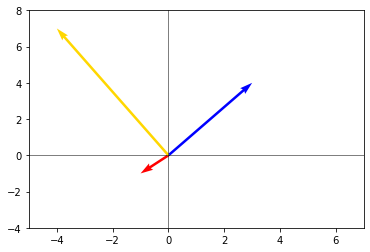

In [2]:
# koordinatsysem

plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(-5,7)
plt.ylim(-4,8)

# vektorer

plt.quiver(0, 0, 3, 4, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(0, 0, -1, -1, angles='xy', scale_units='xy', scale=1, color='red')
plt.quiver(0, 0, -4, 7, angles='xy', scale_units='xy', scale=1, color='gold')


Pile bruges til at visualisere individuelle vektorer, fordi de understreger de to nøgleegenskaber for en vektor - **retning** og **længde**. 
Retningen af ​​en vektor beskriver hvilken vej den peger og længden burde være selv-forklarende. 

I de følgende visualiseringer finder du eksempler på 2 vektorer med samme retning, men forskellig størrelse og 2 eksempler på vektorer med samme størrelse, men forskellige retninger.

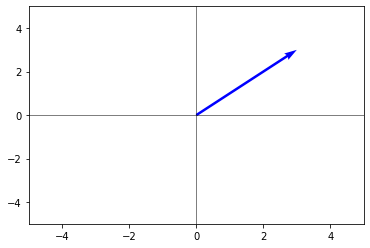

In [3]:
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.quiver(0, 0, 3, 3, angles='xy', scale_units='xy', scale=1, color='blue')

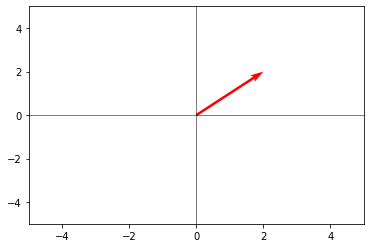

In [4]:
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.quiver(0, 0, 2, 2, angles='xy', scale_units='xy', scale=1, color='red')

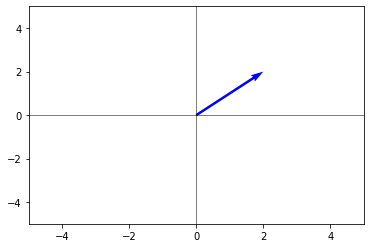

In [5]:
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.quiver(0, 0, 2, 2, angles='xy', scale_units='xy', scale=1, color='blue')

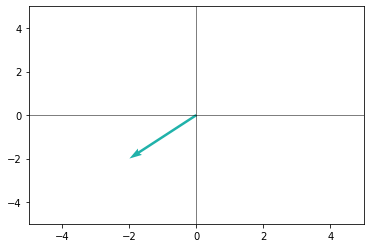

In [7]:
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.quiver(0, 0, -2, -2, angles='xy', scale_units='xy', scale=1, color='lightseagreen')

Som du kan se i koden, kan vi visualisere vektorer med `plt.quiver()`
Her bruger vi for nu altid `angles='xy', scale_units='xy', scale=1` som parameter her, 
Vi kan bruge `color='red'` til at sætte en farve...

Øvelse: Prøv at visualisere - husk at tilpasse koordinatsystemet

\begin{bmatrix}
6\\ 
2\\ 
\end{bmatrix}

\begin{bmatrix}
-3\\ 
-1\\ 
\end{bmatrix}

\begin{bmatrix}
-4\\ 
10\\ 
\end{bmatrix}

**addition**

Ligesom rækker i en matrix kan vektorer lægges sammen og trækkes fra. Når vi adderer eller substraherer vektorer, tilføjes eller trækkes elementer i samme position, og der dannes en ny vektor. Her er et eksempel på, hvor to vektorer adderes:

$$
\begin{bmatrix}
5\\ 
1
\end{bmatrix} + \begin{bmatrix}
1\\ 
3
\end{bmatrix} = 
\begin{bmatrix}
6\\ 
4
\end{bmatrix}
$$


\\
For at visualisere vektoraddition er skal man "forbinde" vektorerne  i stedet for at visualisere alle vektorerne fra $(0,0)$. 

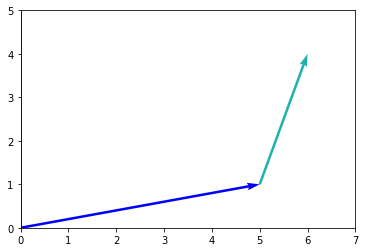

In [9]:
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(0,7)
plt.ylim(0,5)

plt.quiver(0, 0, 5, 1, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(5, 1, 1, 3, angles='xy', scale_units='xy', scale=1, color='lightseagreen')

som man kan se, starter vektor 1 i $(0,0)$ mens vektor to starter i $(5,1)$ hvor vektor 1 ender.

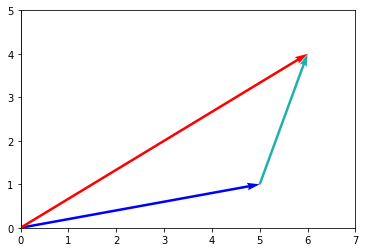

In [10]:
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(0,7)
plt.ylim(0,5)

plt.quiver(0, 0, 5, 1, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(5, 1, 1, 3, angles='xy', scale_units='xy', scale=1, color='lightseagreen')
plt.quiver(0, 0, 6, 4, angles='xy', scale_units='xy', scale=1, color='red')


Det samme (bare omvendt) med at substrahere vektorer:


$$
\begin{bmatrix}
5\\ 
1
\end{bmatrix} - \begin{bmatrix}
1\\ 
3
\end{bmatrix} = 
\begin{bmatrix}
4\\ 
-2
\end{bmatrix}
$$

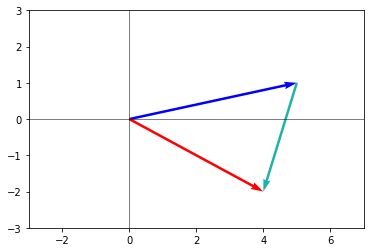

In [12]:
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(-3,7)
plt.ylim(-3,3)

plt.quiver(0, 0, 5, 1, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(5, 1, -1, -3, angles='xy', scale_units='xy', scale=1, color='lightseagreen')
plt.quiver(0, 0, 4, -2, angles='xy', scale_units='xy', scale=1, color='red')

Øvelse: Visualiser

$$
\begin{bmatrix}
5\\ 
2
\end{bmatrix} + \begin{bmatrix}
2\\ 
3
\end{bmatrix} = 
\begin{bmatrix}
?\\ 
?
\end{bmatrix}
$$

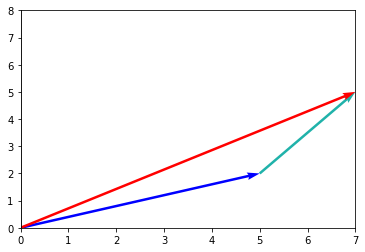

In [15]:
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(0,7)
plt.ylim(0,8)

plt.quiver(0, 0, 5, 2, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(5, 2, 2, 3, angles='xy', scale_units='xy', scale=1, color='lightseagreen')
plt.quiver(0, 0, 7, 5, angles='xy', scale_units='xy', scale=1, color='red')

**At gange vektorer**

Vi kan også skalere vektorer ved at gange eller dividere med en skalar (et reelt tal). Når vi gør det, multipliceres eller deles hvert element i vektoren med skalaren:

$$
4* \begin{bmatrix}
5\\
2
\end{bmatrix} =
\begin{bmatrix}
20\\
8
\end{bmatrix}
$$


Kombinationen af disse regneregler gør det muligt at kombinere vektorer for at opnå nye. Det er en af centrale ideer i linear algebra:

$$
4* \begin{bmatrix}
5\\
2
\end{bmatrix} - 
\begin{bmatrix}
6\\ 
3
\end{bmatrix}=
\begin{bmatrix}
14\\
5
\end{bmatrix}
$$

In [23]:
# eller med numpy (quick and dirty)
4*np.array([5,2])-np.array([6,3])

array([14,  5])

Lad os prøve at beregne

$$
4* \begin{bmatrix}
2\\
1\\
2
\end{bmatrix} - 2*
\begin{bmatrix}
3\\ 
3\\
1
\end{bmatrix}=
\begin{bmatrix}
?\\
?\\
?
\end{bmatrix}
$$

#### om `shape`

Shape funktionen viser os hvor mange rækker/kolonner der er i en matrix. Hvis vi arbejder med en rækkevektor, så er shape $(1,n)$; ved en søjlevektor er det $(n,1)$. 
At beskrive en søjlevektor i Python er ikke smart fordi man skal skrive  `[[1], [2],[3]]` man kan så bruge `reshape(-1,1)` til at omforme en række til en søjlevektor.


In [30]:
#def vektor 1 og lav om til søjle
v1 = np.array([2,1,2], dtype=np.float32)
v1 = v1.reshape(-1,1)

#def vektor 2 og lav om til søjle
v2 = np.array([3,3,1], dtype=np.float32)
v2 = v2.reshape(-1,1)

v_result = v1*4 - v2*2

In [31]:
v_result

array([[ 2.],
       [-2.],
       [ 6.]], dtype=float32)

Den sidste vigtige vektoroperation er prikproduktet/skalarproduktet. 
Det er ikke mulight at multipicere vektorer direkte. 
Prikprodukt ligner multiplikation, men elementerne i vektorerne multipliceres på en bestemt måde. 
Begge disse vektorer skal indeholde det samme antal elementer, hvilket er et krav, som de andre operationer, vi hidtil har lært, også har. 
For at beregne prikproduktet skal vi sammenfatte produkterne med de 2 værdier i hver position i hver vektor:

$$\vec{a} * \vec{b} = \sum_{i=1}^{n} a_i b_i = a_1b_1 + a_2b_2 + ... + a_nb_n$$

$$
\begin{bmatrix}
2\\
1\\
2
\end{bmatrix} *
\begin{bmatrix}
3\\ 
3\\
1
\end{bmatrix}= (2·3)+(1·3)+(2·1) = 11
$$

In [32]:
# forkert
np.array([2,1,2]) * np.array([3,3,1])

array([6, 3, 2])

In [33]:
# rigtigt
np.array([2,1,2]).dot(np.array([3,3,1]))

11

In [36]:
# eller:

a = np.array([2,1,2]).reshape(-1,1)
b = np.array([3,3,1]).reshape(-1,1)

a[:,0] @ b

array([11])

In [37]:
# eller 

np.dot(a[:,0],b)

array([11])

In [38]:
# eller

from sympy import * #importer alt fra Sympy
from sympy.matrices import Matrix #importer matrix

M = Matrix([2,1,2])
N = Matrix([3,3,1])

M.dot(N)

11

I modsætning til de andre vektoroperationer er resultatet her en skalær værdi, ikke en vektor. Selvom vi ikke udnytter prikproduktet med det samme, vil det være centralt i næste session, når vi lærer, hvordan vi multiplicerer en matrix og en vektor sammen.

Øvelse: Beregn i hånden, numpy og sympy

$$
\begin{bmatrix}
3\\
5\\
1
\end{bmatrix} *
\begin{bmatrix}
2\\ 
1\\
3
\end{bmatrix}= 
$$

$ (3·2)+(5·1)+(1·3) = 14 $

In [46]:
np.array([3,5,1]) @ np.array([2,1,3])

14

In [47]:
np.array([3,5,1]).dot(np.array([2,1,3]))

14

In [48]:
M = Matrix([3,5,1])
N = Matrix([2,1,3])

M.dot(N)

14

Vi har indtil videre set, at vi kan multiplicere vektorer med en skalær værdi og kombinere vektorer ved hjælp af +/-. 

Ved hjælp af disse operationer kan vi bestemme, om en bestemt vektor kan findes ved at kombinere andre vektorer. For eksempel vil vi måske vide, om vi kan kombinere vektorerne $\begin{bmatrix} 2\\ 3 \end{bmatrix}$ og $\begin{bmatrix} 3\\ 1 \end{bmatrix}$ til opnå $\begin{bmatrix} 1\\ 5 \end{bmatrix}$

Vi kan skrive vores problem som:

$$c_1 \begin{bmatrix} 2\\ 3 \end{bmatrix} + c_2 \begin{bmatrix} 3\\ 1 \end{bmatrix}  = \begin{bmatrix} 1\\ 5 \end{bmatrix}$$

$c_1$ og $c_2$ er variable, som skalerer hvores vektorer og vi vil gerne finde en løsning, hvor vores ligning går op.

Det at kunne skalere vektorer ved hjælp af skalær multiplikation og derefter tilføje eller trække disse skalerede vektorer er kendt som **lineær kombination**. 

Konceptet er afgørende for at kunne anvende lineær algebra til at løse nyttige problemer. Ved hjælp af begrebet lineær kombination kan vi omformulere vores problem til det følgende:

er $\begin{bmatrix} 1\\ 5 \end{bmatrix}$ en lineær kombination af $\begin{bmatrix} 3\\ 1 \end{bmatrix}$ og $\begin{bmatrix} 2\\ 3 \end{bmatrix}$?

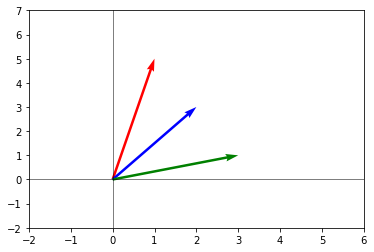

In [49]:
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(-2,6)
plt.ylim(-2,7)

plt.quiver(0, 0, 1, 5, angles='xy', scale_units='xy', scale=1, color='red')
plt.quiver(0, 0, 2, 3, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(0, 0, 3, 1, angles='xy', scale_units='xy', scale=1, color='green')


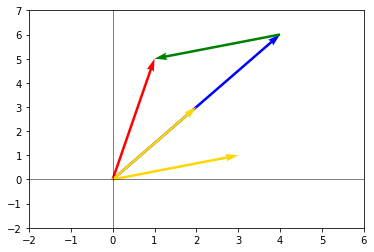

In [50]:
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(-2,6)
plt.ylim(-2,7)

plt.quiver(0, 0, 4, 6, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(4, 6, -3, -1, angles='xy', scale_units='xy', scale=1, color='green')
plt.quiver(0, 0, 1, 5, angles='xy', scale_units='xy', scale=1, color='red')

plt.quiver(0, 0, 2, 3, angles='xy', scale_units='xy', scale=1, color='gold')
plt.quiver(0, 0, 3, 1, angles='xy', scale_units='xy', scale=1, color='gold')


$c_1 = 2$; $c_2 = -1$

Sidste gang talte så vi på lønoptimering og endte med at skrive de 2 ligninger, som representerer jobtilbud i matrix-form:

**augmented matrix**

$$
\left[
  \begin{matrix}
    300 & -1 \\
    400 & -1 \\
  \end{matrix}
  \left|
    \,
    \begin{matrix}
      -2500  \\
      -500  \\
    \end{matrix}
  \right.
\right]
$$

**nu kan vi prøve at forbinde denne matrix til ideen om liniær kombination, som vi lige har set**

Vi vil så gerne vide, om $\begin{bmatrix} -2500\\ -500 \end{bmatrix}$ er en liniær kombination af $\begin{bmatrix} 300\\ 400 \end{bmatrix}$ og $\begin{bmatrix} -1\\ -1 \end{bmatrix}$

for at finde løsningen, skal vi så finde værdier til $x$ og $y$ hvor følgende gælder:

$$x \begin{bmatrix} 300\\ 400 \end{bmatrix} + y \begin{bmatrix} -1\\ -1 \end{bmatrix} = \begin{bmatrix} -2500\\ -500 \end{bmatrix}$$

Sidste gang fandt vi en løsning ved at bruge rækkeoperationer indtil vi kom frem til:

$$\left[\begin{array}{rr|r}
1 & 0 & x\\ 
0 & 1 & y
\end{array}\right]$$

Det sidste koncept, vi kort introducerer her, er matrixligningen. Matrixligningen er repræsentationen af ​​et lineært system, der kun bruger matricer og vektorer. Her er den augmented matrix, vi startede med:

$$
\left[
  \begin{matrix}
    300 & -1 \\
    400 & -1 \\
  \end{matrix}
  \left|
    \,
    \begin{matrix}
      -2500  \\
      -500  \\
    \end{matrix}
  \right.
\right]
$$

som er en forkortelse af

$$\left[\begin{array}{rr|r}
300 & -1 \\ 
400 & -1 
\end{array}\right] \begin{bmatrix} x\\ y \end{bmatrix} =  \begin{bmatrix} -2500\\ -500 \end{bmatrix}$$


På venstre side multiplicerer vi en matrix med koefficienterne, med vektoren, der indeholder variablerne. 

Højre side holder de konstante værdier. 

Denne adskillelse af koefficienter og variabler fra konstanterne bude være bekendt. Dette er præcis, hvad vi også gjorde i den generelle form!


Man plejer at bruge $x_1,x_2,...x_n$ i stedet for $x,y$ når man skal repræsentere individuelle værdier af en løsningsvektor. Det giver os muligheden at arbejde med så mange værdier som vi har lyst til (ikke kun ~26).

$$\left[\begin{array}{rr|r}
300 & -1 \\ 
400 & -1 
\end{array}\right] \begin{bmatrix} x_1\\ x_2 \end{bmatrix} =  \begin{bmatrix} -2500\\ -500 \end{bmatrix}$$


Vi kan nu også introducere den aritmetiske repræsentation af matrixligningen: $A\vec{x} = \vec{b}$


Hvor $A$ repræsenterer koefficientmatrix, $\vec{x}$ repræsenterer løsningsvektoren, og $\vec{b}$ repræsenterer konstanterne. OBS $\vec{b}$ kan ikke være en vektor, der kun holder nuller, også kendt som nulfaktoren $\vec{0}$.

Før vi kan arbejde med denne form for systemer, skal vi lære om følgende emner i det næste afstnitt:

- regler, der beskriver, hvordan matricer kan kombineres
- hvordan man multiplicerer en matrix med en vektor
- hvordan man beregner løsningsvektor $\vec{x}$
 uden at bruge Gauss-eliminering.


## Husk:



*   Når vi taler om matricer, så er det først rækker og så kolonner, der tælles - en $2x3$ matrix har 2 rækker og 3 kolonner.
*   En liste af tal fra en matrix er en vektor. En række - en rækkevektor, en kolonne - en søjlevektor
* En Vektor visualiseres tit ved at bruge piler, der starter i $(0,0)$ for at understrege, længten og rettning som dets egenskaber.
* Lige som rækker i en matrix, vi kan også summe og trække fra med vektorer. Man kan også skalere op vektorer ved at multiplicere med tal > 1 og < -1; og ned ved at multimplicere med tal mellem -1 og 1.
* dot-product elle prikprodukt beregnes ved at summe produkter af de 2 værdier for alle positioner i de vektorer der skal multipliceres. $$\vec{a} * \vec{b} = \sum_{i=1}^{n} a_i b_i = a_1b_1 + a_2b_2 + ... + a_nb_n$$

* En lineær kombination er vektorer, som bliver skaleret og bagefter lagt sammen eller trukket fra.

* Den aritmetiske repræsentation af matrixligningen er $A\vec{x} = \vec{b}$ hvor $A$ repræsenterer koefficientmatrix, $\vec{x}$ repræsenterer løsningsvektoren, og $\vec{b}$ repræsenterer konstanterne. OBS $\vec{b}$ kan ikke være en vektor, der kun holder nuller, også kendt som nulfaktoren $\vec{0}$.




